# Data Exploration, Processing and Visualization

## 🗝️ Key Objectives

- ✅ Load and explore the dataset (shape, dtypes, missing values, and distributions)  
- ✅ Clean and prepare data (handle missing values, set correct types, and create new columns)  
- ✅ Summarize using `groupby`, `pivot`, and simple aggregations  
- ✅ Visualize patterns using `Matplotlib` and `Seaborn`  
- ✅ Draw 2–3 clear insights based on the analysis and plots  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = sns.load_dataset('flights')
display(data)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


## **Exploratory Data Analysis**

In [12]:
data.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [13]:
print('==Original shape==')
print(data.shape)
print(f'\nThe shape of this dataset is: {data.shape}')

==Original shape==
(144, 3)

The shape of this dataset is: (144, 3)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### Check the distributions

In [15]:
print(data.describe())


              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


##### We have in total 144 months, from 1949 to 1960. The mean of the values is 280.3 passengers for month. We have std 119.97  means  that some months have more or less passengers than mean. The month with min passangers is with 104 passangers and with max passengers is with 622. 25% or 1-4 month have <=180 passangers, the half of months have <=265.5 and just 25% have more than 360 passangers.

## Data Cleaning and Preparation

- Checked for missing values and handled them appropriately (e.g., dropped or filled).  
- Verified data types (converted months to categorical, years to numeric).  
- Created derived columns such as:  
  - **date** → combining year and month  
  - **season** → categorizing months  
  - **passenger_bin** → Low / Medium / High traffic  
  - **yearly_growth** → percentage change compared to previous year  


In [16]:
print('===Missing values check===')
print(data.isnull().sum())
print(f'\nThe total number of missing values: {data.isnull().sum().sum()}')

===Missing values check===
year          0
month         0
passengers    0
dtype: int64

The total number of missing values: 0


In [17]:
print('===Check Duplicates===')
print(data.duplicated().sum())
print(f'\nThe duplicated rows are : {data.duplicated().sum()}')

===Check Duplicates===
0

The duplicated rows are : 0


In [18]:
print('==Check data type of the elements in dataset==')
print('\n', data.dtypes)


==Check data type of the elements in dataset==

 year             int64
month         category
passengers       int64
dtype: object


##### After you cleaned datas, checked for duplicates, checked for missing values or dropped rows,   you return your new clean dataset and reset the index with (reset_index(drop=True)), if not of element is not the exact dtype we should convert for example data['month'] = data['month'].astype('category')

In [19]:
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
data['month'].value_counts()

month
Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: count, dtype: int64

## 🚀 Feature Creation for Deeper Insights

In [21]:
print('===Adding new columns for dataset===')

def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['month'].apply(get_season)
data.head(15)


===Adding new columns for dataset===


,year,month,passengers,season
0,1949,Jan,112,Winter
1,1949,Feb,118,Winter
2,1949,Mar,132,Spring
3,1949,Apr,129,Spring
4,1949,May,121,Spring
5,1949,Jun,135,Summer
6,1949,Jul,148,Summer
7,1949,Aug,148,Summer
8,1949,Sep,136,Autumn
9,1949,Oct,119,Autumn


In [22]:
data['month'] = data['month'].astype(str)
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'], format='%Y-%b')
display(data)

,year,month,passengers,season,date
0,1949,Jan,112,Winter,1949-01-01
1,1949,Feb,118,Winter,1949-02-01
2,1949,Mar,132,Spring,1949-03-01
3,1949,Apr,129,Spring,1949-04-01
4,1949,May,121,Spring,1949-05-01
...,...,...,...,...,...
139,1960,Aug,606,Summer,1960-08-01
140,1960,Sep,508,Autumn,1960-09-01
141,1960,Oct,461,Autumn,1960-10-01
142,1960,Nov,390,Autumn,1960-11-01


In [23]:
data_col = data.set_index('date')
display(data)

,year,month,passengers,season,date
0,1949,Jan,112,Winter,1949-01-01
1,1949,Feb,118,Winter,1949-02-01
2,1949,Mar,132,Spring,1949-03-01
3,1949,Apr,129,Spring,1949-04-01
4,1949,May,121,Spring,1949-05-01
...,...,...,...,...,...
139,1960,Aug,606,Summer,1960-08-01
140,1960,Sep,508,Autumn,1960-09-01
141,1960,Oct,461,Autumn,1960-10-01
142,1960,Nov,390,Autumn,1960-11-01


### 🧮 Categorizing Passenger Traffic Levels

To make the dataset easier to interpret, I divided the number of passengers into three categories (**bins**) based on traffic volume:

- **Low** → Fewer than 200 passengers  
- **Medium** → Between 200 and 400 passengers  
- **High** → More than 400 passengers  

This categorization helps identify **low-, medium-, and high-traffic months** throughout the years, making it easier to compare travel intensity across **seasons** and **time**.


In [24]:
print('====Bins for low, medium and high passenger months====')

bins = [0, 200, 400, data['passengers'].max()]
labels= ['Low', 'Medium', 'High']

data['passenger_bin'] = pd.cut(data['passengers'], bins=bins, labels=labels)
display(data)


====Bins for low, medium and high passenger months====


,year,month,passengers,season,date,passenger_bin
0,1949,Jan,112,Winter,1949-01-01,Low
1,1949,Feb,118,Winter,1949-02-01,Low
2,1949,Mar,132,Spring,1949-03-01,Low
3,1949,Apr,129,Spring,1949-04-01,Low
4,1949,May,121,Spring,1949-05-01,Low
...,...,...,...,...,...,...
139,1960,Aug,606,Summer,1960-08-01,High
140,1960,Sep,508,Autumn,1960-09-01,High
141,1960,Oct,461,Autumn,1960-10-01,High
142,1960,Nov,390,Autumn,1960-11-01,Medium


In [25]:
data['yearly_growth'] = data.groupby('month')['passengers'].pct_change() * 100
data['yearly_growth'] = data['yearly_growth'].round(2)
display(data)

,year,month,passengers,season,date,passenger_bin,yearly_growth
0,1949,Jan,112,Winter,1949-01-01,Low,NaN
1,1949,Feb,118,Winter,1949-02-01,Low,NaN
2,1949,Mar,132,Spring,1949-03-01,Low,NaN
3,1949,Apr,129,Spring,1949-04-01,Low,NaN
4,1949,May,121,Spring,1949-05-01,Low,NaN
...,...,...,...,...,...,...,...
139,1960,Aug,606,Summer,1960-08-01,High,8.41
140,1960,Sep,508,Autumn,1960-09-01,High,9.72
141,1960,Oct,461,Autumn,1960-10-01,High,13.27
142,1960,Nov,390,Autumn,1960-11-01,Medium,7.73


In [26]:
print('======Pivot Table=====')


pivot = data.pivot_table(index=['season', 'passenger_bin'], values='passengers', columns='year', aggfunc='sum')
display(pivot)

======Pivot Table=====


C:\Users\sindi\AppData\Local\Temp\ipykernel_704\1097166762.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data.pivot_table(index=['season', 'passenger_bin'], values='passengers', columns='year', aggfunc='sum')


year                  1949  1950  1951  1952  1953  1954  1955  1956  1957  \
season passenger_bin                                                         
Autumn Low             359   405   492   363   180     0     0     0     0   
       Medium            0     0     0   209   448   691   823   932   652   
       High              0     0     0     0     0     0     0     0   404   
Spring Low             382   401   513   557     0     0     0     0     0   
       Medium            0     0     0     0   700   696   806   948  1059   
       High              0     0     0     0     0     0     0     0     0   
Summer Low             431   489   576     0     0     0     0     0     0   
       Medium            0     0     0   690   779   859  1026   374     0   
       High              0     0     0     0     0     0     0   818  1354   
Winter Low             348   381   461   545   392   188     0     0     0   
       Medium            0     0     0     0   201   433   753   867   952   
       High              0     0     0     0     0     0     0     0     0   

year                  1958  1959  1960  
season passenger_bin                    
Autumn Low               0     0     0  
       Medium          669   362   390  
       High            404   870   969  
Spring Low               0     0     0  
       Medium         1073   396     0  
       High              0   826  1352  
Summer Low               0     0     0  
       Medium            0     0     0  
       High           1431  1579  1763  
Winter Low               0     0     0  
       Medium          995   702   391  
       High              0   405   849

- **Check the unique values**

In [27]:
data['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [28]:
data['season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

## Visualizations

###  Line Plot — Average Passengers Over Years
- **Purpose:** Displays how the number of passengers grows over time.  
- **Description:** There is a consistent upward trend from 1949 to 1960, indicating steady growth in air travel.


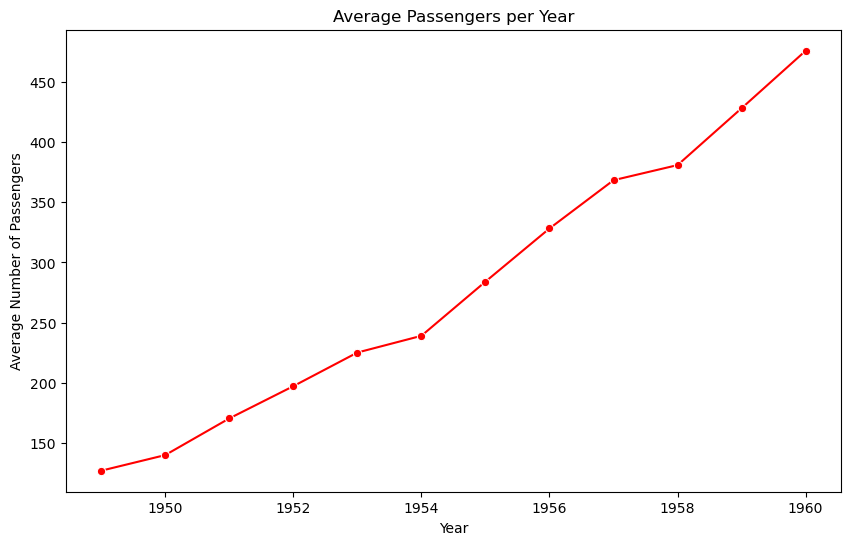

In [29]:
avg_pass_per_year = data.groupby('year')['passengers'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='passengers', data=avg_pass_per_year, marker='o', color='red')
plt.title("Average Passengers per Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Passengers")
plt.show()


### Trend of Average Passengers per Year

The line plot shows how the **average number of passengers per year** changed from 1949 to 1960. 

Observations:
- There is a clear **upward trend** over the years, indicating that the number of passengers **increased steadily** year by year.
- The growth is mostly smooth, with no dramatic drops.
- This suggests a **consistent rise in air travel** during this period.

The plot helps to quickly visualize **long-term growth** and seasonal patterns when combined with monthly analysis.


### Barplot — Average Passengers per Month
- **Purpose:** Shows how passenger numbers vary across months over all years.  
- **Description:** Peaks appear during summer months (July–August) and troughs during winter (January–February), highlighting strong seasonal patterns.


C:\Users\sindi\AppData\Local\Temp\ipykernel_704\3361558046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_passengers_month.index, y=avg_passengers_month.values, palette='Pastel2')


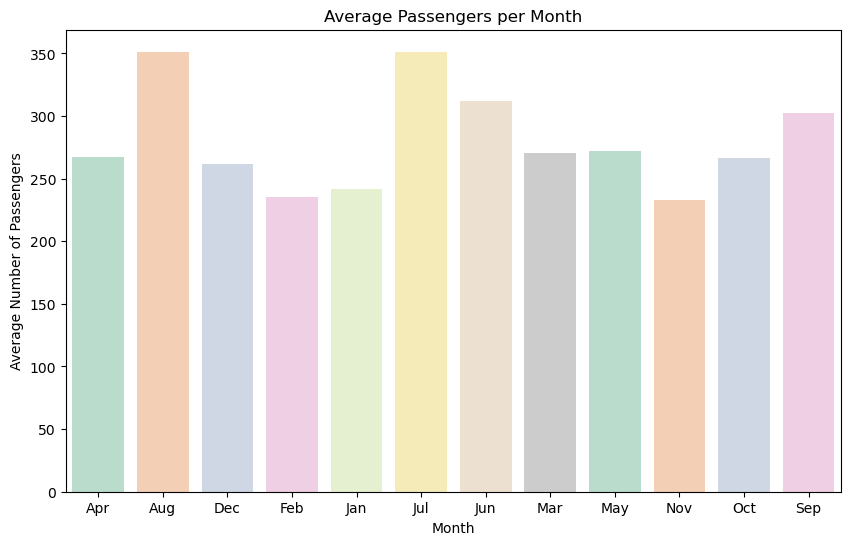

In [30]:
# Compute average passengers per month across all years
avg_passengers_month = data.groupby('month')['passengers'].mean().reindex()


# Plot histogram / barplot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_passengers_month.index, y=avg_passengers_month.values, palette='Pastel2')
plt.title("Average Passengers per Month")
plt.xlabel("Month")
plt.ylabel("Average Number of Passengers")
plt.show()


### Strip Plot — Passengers per Season
- **Purpose:** To visualize how passenger numbers are distributed across different seasons.  
- **Description:** Each dot represents a month’s passenger count. The plot shows that **summer months** (June–August) generally have the **highest passenger traffic**, while **winter months** (December–February) have lower counts. The jittered points make it easier to see individual data values and variations within each season.


C:\Users\sindi\AppData\Local\Temp\ipykernel_704\3193516555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='season', y='passengers', data=data, jitter=True, palette='Set2')


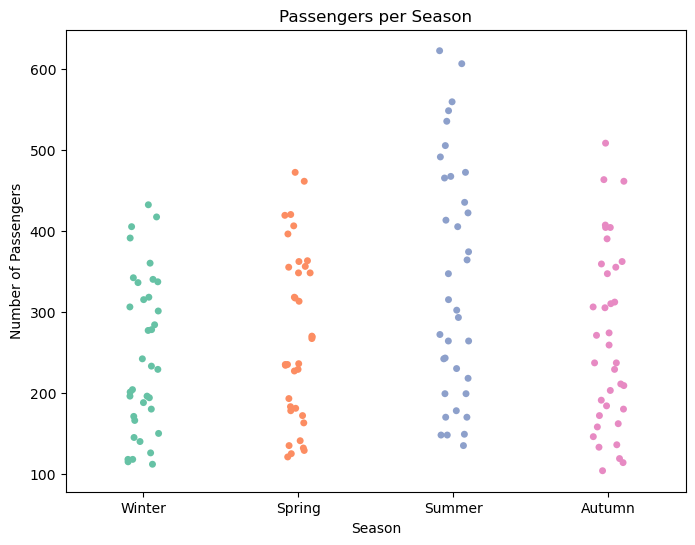

In [31]:
plt.figure(figsize=(8,6))
sns.stripplot(x='season', y='passengers', data=data, jitter=True, palette='Set2')
plt.title('Passengers per Season')
plt.xlabel('Season')
plt.ylabel('Number of Passengers')
plt.show()

###  Heatmap — Correlation Between Year, Month, and Passengers
- **Purpose:** Visualizes relationships and potential trends between numeric and categorical variables.  
- **Description:** Shows yearly growth and seasonal trends, helping to identify periods with high passenger traffic.


<Axes: xlabel='year', ylabel='month'>

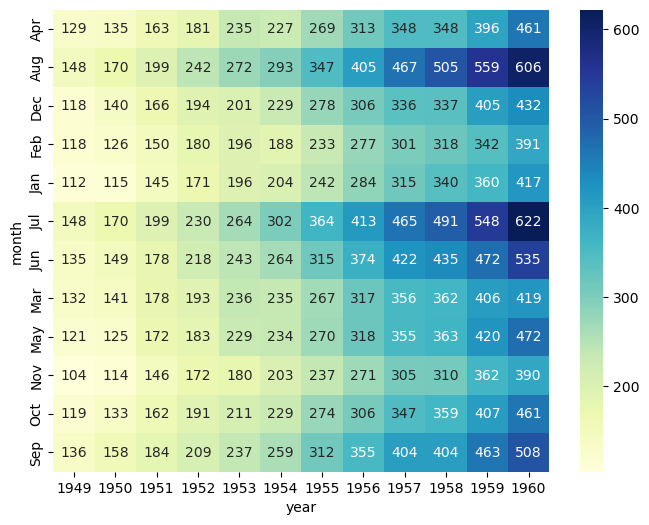

In [32]:
pivot = data.pivot_table(values='passengers', index='month', columns='year', observed=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')

### ScatterPlot — Yearly growth per year

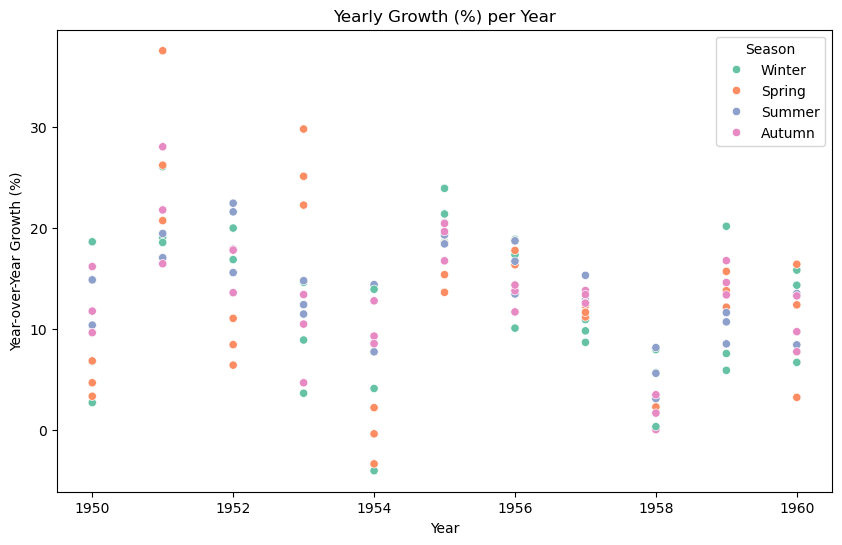

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='yearly_growth', data=data, hue='season', palette='Set2')
plt.title("Yearly Growth (%) per Year")
plt.xlabel("Year")
plt.ylabel("Year-over-Year Growth (%)")
plt.legend(title='Season')
plt.show()


### BoxPlot — Passenger Distribution by Year

C:\Users\sindi\AppData\Local\Temp\ipykernel_704\160590866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='passengers', data=data, palette='coolwarm')


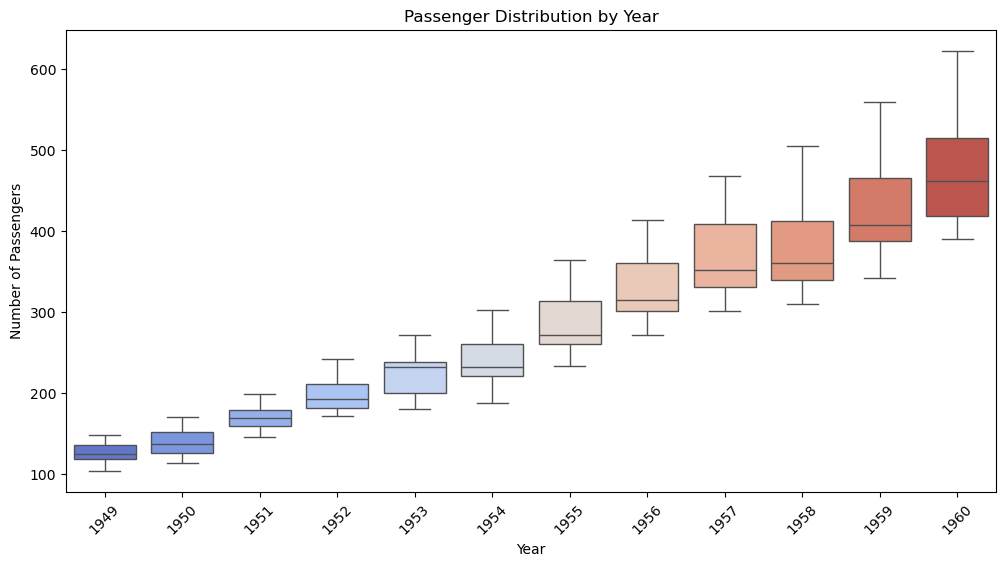

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='passengers', data=data, palette='coolwarm')
plt.title("Passenger Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)

plt.show()


### **How do passenger counts change over time?**
- Create a **time-series line plot** to visualize how the number of passengers changes across years.
- This helps us clearly see the **overall trend** in passenger growth over time.
  - #### **Insights:**  
Passenger numbers show a **steady upward trend** from 1949 to 1960, indicating strong growth in air travel demand over time.  

The lowest passenger count appears at the beginning of the period, while the highest occurs near the end, confirming **long-term increasing**.

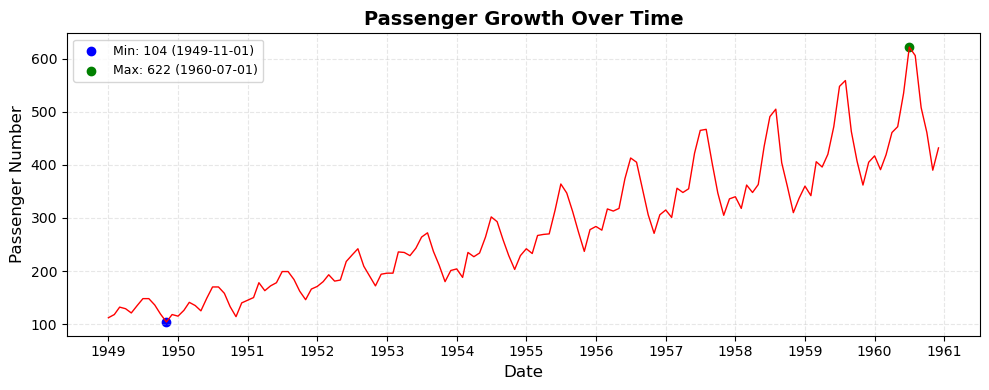

In [35]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

x = data['date']
y = data['passengers']

plt.figure(figsize=(10, 4))

plt.plot(x, y, color='red', linewidth=1)

min_idx = data['passengers'].idxmin()
max_idx = data['passengers'].idxmax()

min_date, min_val = data.loc[min_idx, ['date', 'passengers']]
max_date, max_val = data.loc[max_idx, ['date', 'passengers']]

min_point = plt.scatter(min_date, min_val, color='blue', label=f"Min: {min_val} ({min_date.date()})")
max_point = plt.scatter(max_date, max_val, color='green', label=f"Max: {max_val} ({max_date.date()})")

plt.legend(fontsize=9)

plt.title("Passenger Growth Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Passenger Number", fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### **How do passenger counts vary from month to month?**
- Create a **box plot** to compare passenger distributions for each month across all years.  
- This helps us identify **monthly travel patterns**, showing which months tend to have **higher** or **lower** passenger volumes.
- #### **Insights:**  
  Passenger demand is **highest from June to August**, peaking in **July**, indicating strong summer travel activity.
    
  **November and December** show consistently **lower passenger counts**, reflecting reduced travel in late autumn and early winter.
    
  The pattern across months confirms a **clear seasonal cycle**, with travel rising into summer and falling toward the end of the year.



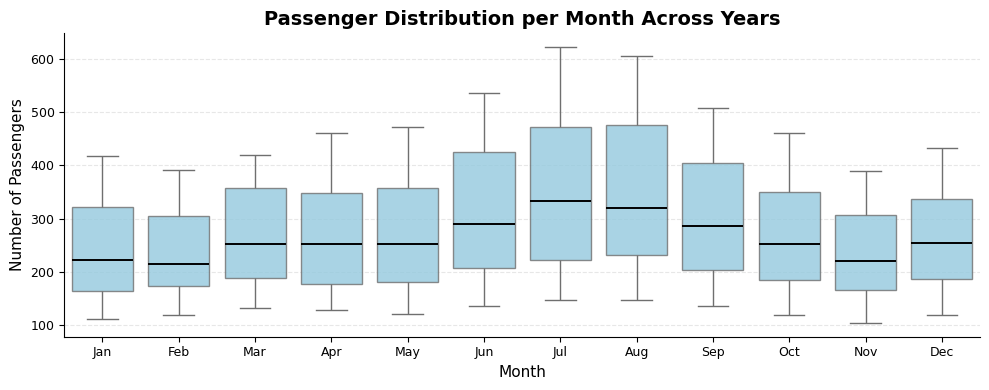

In [36]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='passengers', data=data, color='skyblue',
            boxprops=dict(alpha=0.8),
            medianprops=dict(color='black', linewidth=1.4))

plt.title("Passenger Distribution per Month Across Years", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=11)
plt.ylabel("Number of Passengers", fontsize=11)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


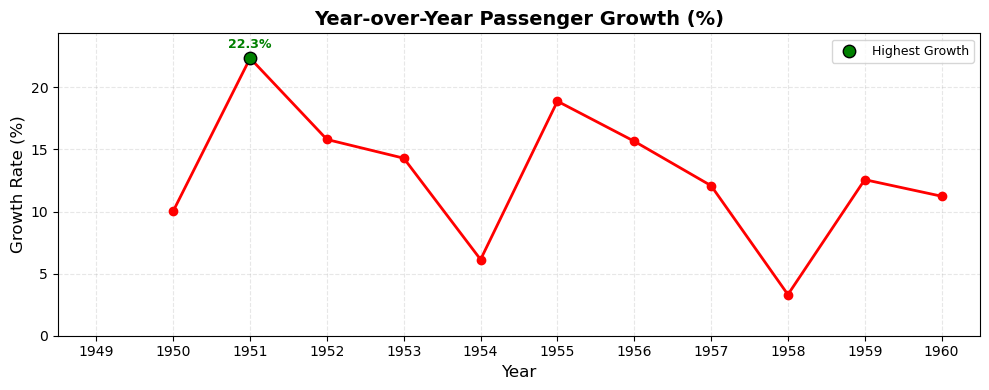

In [37]:
yearly_growth = data.groupby('year')['yearly_growth'].mean().reset_index()

x = yearly_growth['year']
y = yearly_growth['yearly_growth']

plt.figure(figsize=(10,4))
plt.plot(x, y, color='red', linewidth=2, marker='o', markersize=6)

ax = plt.gca()

ax.set_title("Year-over-Year Passenger Growth (%)", fontsize=14, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Growth Rate (%)", fontsize=12)

max_idx = y.idxmax()
ax.scatter(x[max_idx], y[max_idx], 
           color='green', edgecolor='black', s=80, zorder=5, label='Highest Growth')

ax.text(x[max_idx], y[max_idx] + 0.8, f"{y[max_idx]:.1f}%", 
        ha='center', fontsize=9, fontweight='bold', color='green')

ax.set_xticks(x)
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(0, y.max() + 2)

ax.legend(fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()


### **How are passenger counts distributed overall?**
- Create a **histogram** to see how frequently different passenger levels occur.  
- This helps us understand the **shape of the distribution**, identify **common ranges**, and see whether values are **skewed** toward lower or higher passenger counts.
- #### **Insights:**  
  The average passenger count across the entire dataset is **~280 passengers per month** (red dashed line).
   
  Values below the mean mostly correspond to the **earlier years**, while values above the mean reflect the **later years** as air travel became more common.

  The distribution is **right-skewed**, meaning lower counts occurred more frequently in the early years, and higher counts became more frequent over time.

  Counts change **gradually**, and there are **no extreme outliers**, indicating steady growth rather than sudden jumps or drops.


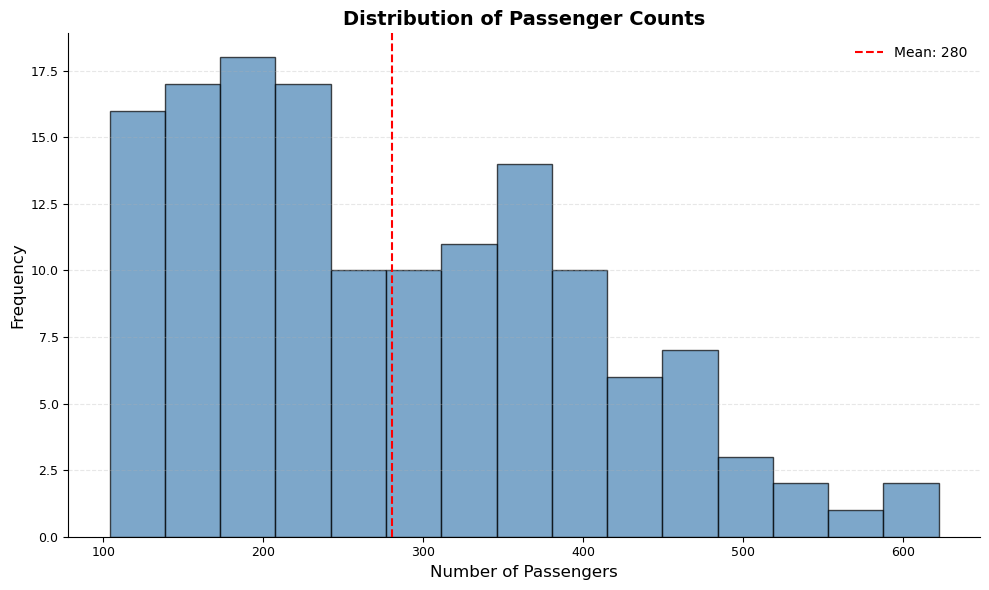

In [38]:
plt.figure(figsize=(10,6))
plt.hist(data['passengers'], bins=15, color='steelblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Passenger Counts', fontsize=14, fontweight='bold')
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

ax.grid(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

mean_val = data['passengers'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {int(mean_val)}")
plt.legend(frameon=False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

### **What is the long-term trend in passenger numbers?**
- Create a **regression plot** to visualize the overall relationship between year and passenger counts.  
- The regression line helps us see the **long-term direction of growth**, smoothing out short-term fluctuations.
  - #### **Insights:**  
  Passenger counts show a **clear and consistent upward trend** over the years, indicating that air travel demand **grew steadily throughout the period**.  

  The regression trend line smooths out month-to-month fluctuations and highlights the **long-term growth pattern**, confirming that the increase in passenger volume was **not random**, but part of a **sustained upward trajectory**.  

  This trend reflects the **ongoing expansion of commercial air travel**, likely driven by **increased accessibility, improvements in aviation infrastructure, and broader adoption of air travel** during this time.

  

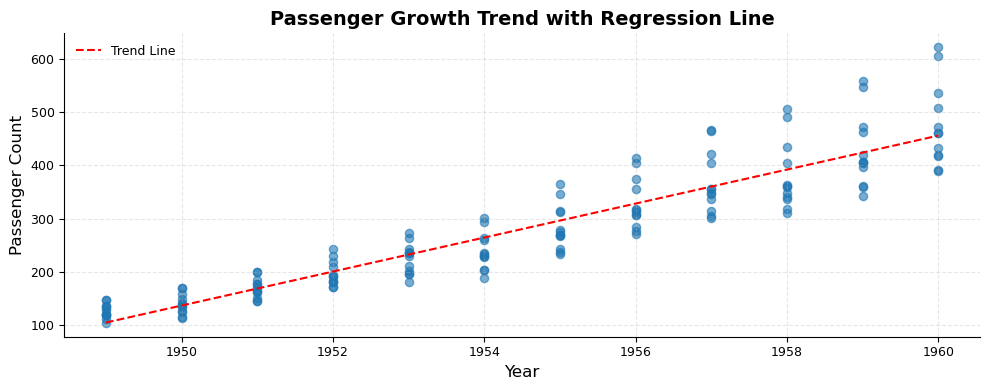

In [39]:
plt.figure(figsize=(10, 4))
ax = plt.gca()

ax = sns.regplot(
    x='year', y='passengers', data=data,
    scatter_kws={'alpha': 0.6, 's': 35},
    line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 1.5},
    ci=None 
)

ax.set_title('Passenger Growth Trend with Regression Line', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Passenger Count', fontsize=12)

ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

ax.grid(True, linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

trend_line = ax.lines[0]

ax.legend(
    handles=[trend_line],
    labels=['Trend Line'],
    frameon=False,
    fontsize=9,
    loc='upper left'
)

plt.tight_layout()
plt.show()


### **How do passenger counts vary across months and years?**
- Create a **heatmap** to visualize passenger volume by month and year.  
- This allows us to clearly identify **seasonal patterns** and see how **travel demand increases over time**.
  - #### **Insights:**  
  Passenger counts **increase steadily across years** and within each year, **Summer months show the highest demand** while **Winter months show the lowest**, highlighting a strong and consistent seasonal pattern.

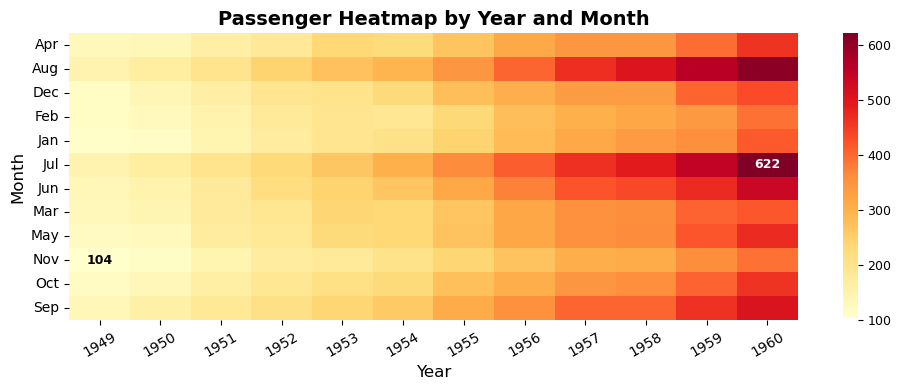

In [40]:
plt.figure(figsize=(10,4))
sns.heatmap(pivot, cmap='YlOrRd')

plt.title("Passenger Heatmap by Year and Month", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=10, rotation=30)
ax.tick_params(axis='y', labelsize=10)

min_val = pivot.min().min()
max_val = pivot.max().max()

min_loc = np.where(pivot == min_val)
max_loc = np.where(pivot == max_val)

ax.text(min_loc[1][0] + 0.5, min_loc[0][0] + 0.5, f"{int(min_val)}",
        ha='center', va='center', fontsize=9, fontweight='bold', color='black')

ax.text(max_loc[1][0] + 0.5, max_loc[0][0] + 0.5, f"{int(max_val)}",
        ha='center', va='center', fontsize=9, fontweight='bold', color='white')

cbar = ax.collections[0].colorbar
ticks = np.arange(100, max_val  + 1, 100, dtype=int)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()

### Brief Note: Steps, Assumptions, and Insights

**Steps Taken:**
1. Loaded the Flights dataset using Seaborn (`sns.load_dataset('flights')`) and inspected the first few rows.
2. Checked for missing values — dataset was complete.
3. Created additional columns:
   - `date` (combining year and month),
   - `season` (Winter, Spring, Summer, Autumn),
   - `passenger_bin` (Low / Medium / High traffic),
   - `yearly_growth` (percentage change from same month in previous year).
4. Performed EDA using:
   - Histogram (average passengers per month),
   - Lineplot (passengers over years),
   - Heatmap (correlation between year, month, and passengers),
   - Scatter plot (year vs passengers),
   - Stripplot (passengers per season),
   - Boxplot (distribution by year and season).

**Assumptions:**
- Monthly passenger counts are accurate and represent total passengers across all flights.
- Seasonal definitions follow meteorological grouping (Winter: Dec–Feb, etc.).
- Growth percentages are meaningful only from the second year onward.

**Final Insights:**
1. **Steady Growth Over Time:** Passenger numbers increased consistently from 1949 to 1960.
2. **Strong Seasonality:** Peaks in summer (July–August) and troughs in winter (Jan–Feb) are clearly visible.
3. **Traffic Categories:** Categorizing months as Low, Medium, and High traffic helps identify busy periods and compare seasons.
4. **Distribution Insights:** Boxplots reveal variability within years and highlight outlier months with unusually high or low passenger counts.
5. **Yearly Growth:** Year-over-year growth shows accelerating demand for air travel in the 1950s.
